In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy as sp
%matplotlib inline

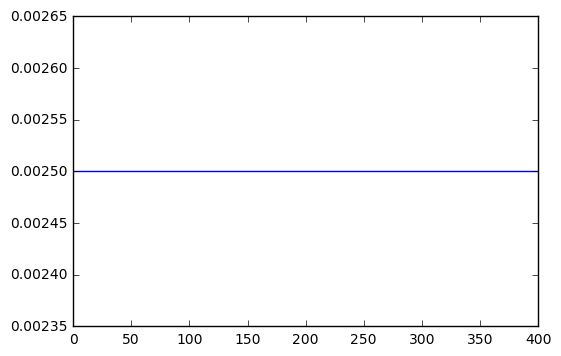

float64


In [2]:
top_hat = signal.boxcar(400)/400
plt.plot(top_hat)
plt.show()
print(top_hat.dtype)

float64
float64


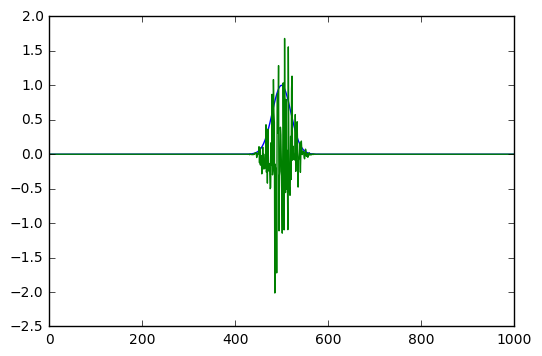

In [3]:
gaussian = signal.gaussian(1000,20)
gaussian2 = gaussian *np.random.normal(0,1,1000)
plt.plot(gaussian)
plt.plot(gaussian2)
print(gaussian.dtype)
print(gaussian2.dtype)

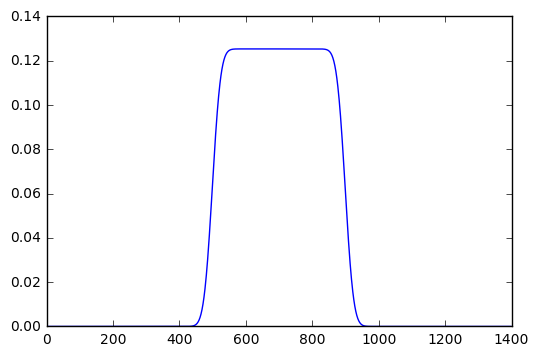

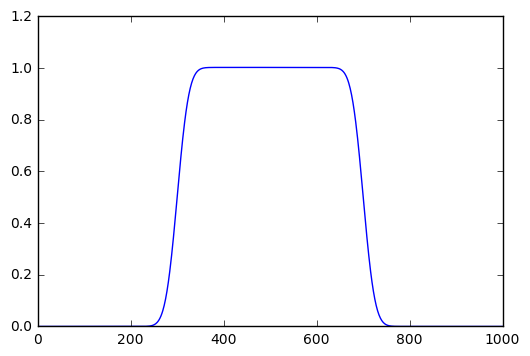

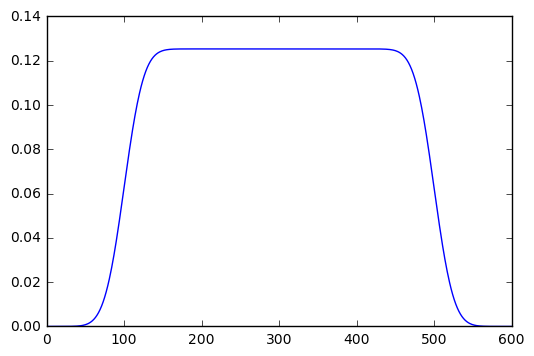

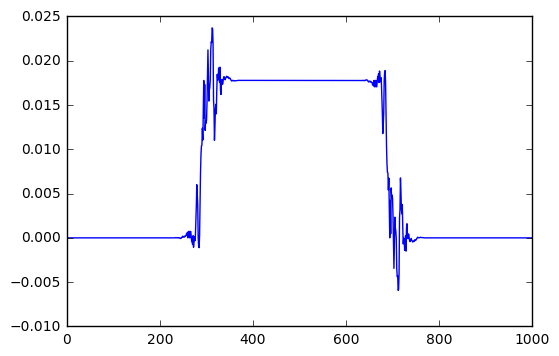

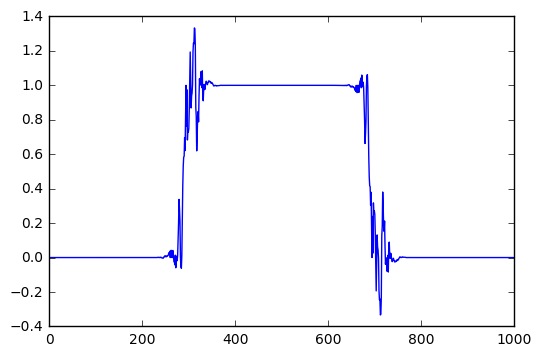

In [4]:
convolved1=np.convolve(top_hat,gaussian)
plt.plot(convolved1)
plt.show()
convolved2=8*np.convolve(top_hat,gaussian,'same')
plt.plot(convolved2)
plt.show()
convolved3=np.convolve(top_hat,gaussian,'valid')
plt.plot(convolved3)
plt.show()
convolved4=np.convolve(top_hat,gaussian2,'same')
plt.plot(convolved4)
plt.show()
plt.plot(convolved4/np.sum(convolved4)*len(top_hat))

In [5]:
np.sum(convolved4)

7.1122620897369719

In [6]:
normed=(convolved2/np.amax(convolved2))

In [7]:
print(np.amax(convolved2))
print(np.sum(convolved2)/len(top_hat))
#len(convolved2)/np.amax(convolved2)#/len(top_hat)*20

1.00265130985
1.00265130985


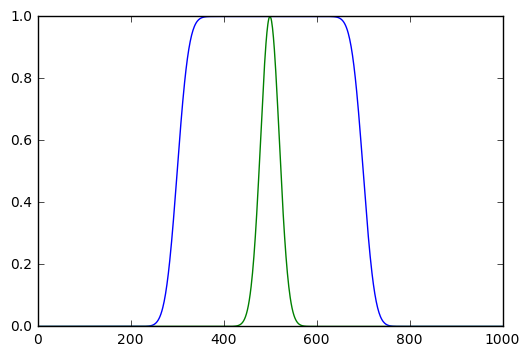

0.466299010931
0.181482238512


In [8]:
plt.plot(normed)
plt.plot(gaussian)
plt.show()
print(np.std(normed))
print(np.std(gaussian))

In [9]:
signal = []
for ii in range(100):
    signal = np.append(signal,gaussian2)

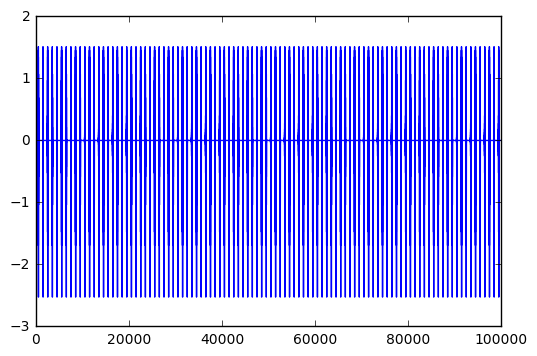

In [10]:
plt.plot(signal)

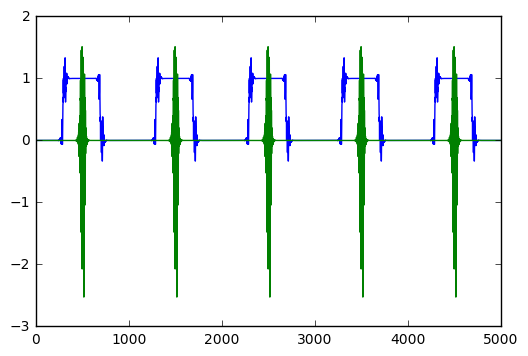

In [11]:
convolved_big=np.convolve(top_hat,signal,'same')
#plt.plot(convolved_big/np.amax(convolved_big))
plt.plot(convolved_big/np.sum(convolved_big)*len(top_hat)*100)
plt.plot(signal)
plt.xlim(0,5000)
plt.show()

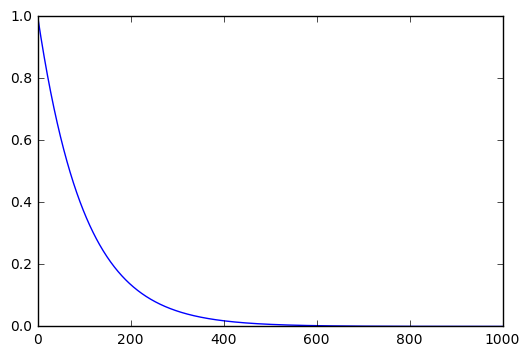

In [6]:
# sample rate is 0.01 seconds
width = 1000
tau_scatter = 2
N_Tau = 10
t = np.linspace(0,N_Tau*tau_scatter,width)
EXP = np.exp(-t/tau_scatter)
plt.plot(EXP)
plt.show()

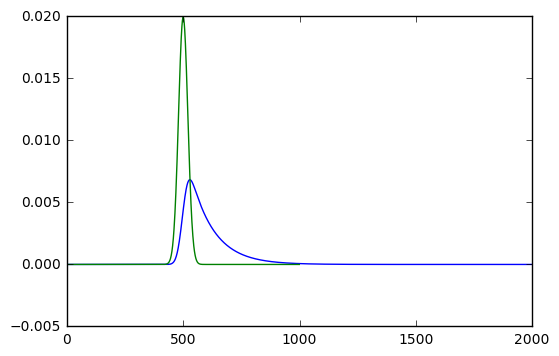

EXP_sum= 100.396321375
exp_convolved1 sum= 6.84720101727e-05
exp_convolved1 sum/EXP_sum 6.8201712209e-07
max 6.84720101727e-05
0.02


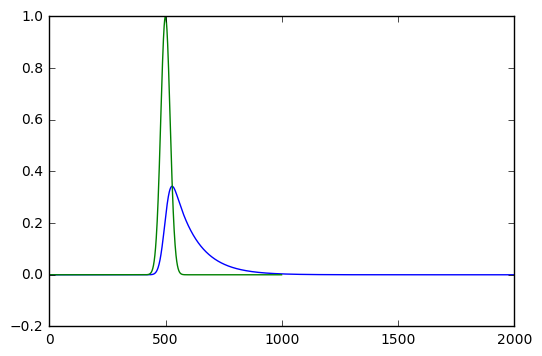

In [7]:
dx = N_Tau*tau_scatter/width
EXP_sum = np.sum(EXP)#*dx
EXP_norm = EXP / EXP_sum
gaussian_norm = gaussian/ np.sum(gaussian)
exp_convolved1=np.convolve(EXP_norm, gaussian_norm, mode='valid')
exp_conv = sp.signal.convolve(EXP_norm, gaussian_norm, mode='full')
plt.plot(exp_conv)
plt.plot(gaussian_norm)
#plt.xlim(0,800)
plt.show()
print('EXP_sum=',EXP_sum)
print('exp_convolved1 sum=',np.sum(exp_convolved1))
print('exp_convolved1 sum/EXP_sum',np.sum(exp_convolved1)/EXP_sum)
print('max',np.amax(exp_convolved1))
print(dx)
plt.plot(exp_conv*np.sum(gaussian))
plt.plot(gaussian)
#plt.xlim(0,800)
plt.show()

So the lesson here seems to normalize both the profile and the exponential and then renormalize the profile by multiplying by the original area. Also, keep the lengths the same and use an N_tau the is appropriate to the window.

In [96]:
np.exp(-6.9)

0.0010077854290485105

In [4]:
import pyfftw

In [4]:
a = pyfftw.empty_aligned((4048, 4048), dtype='complex64')
print(a.shape)
a[:] = np.random.randn(*a.shape) + 1j*np.random.randn(*a.shape)
print(a.shape)
%timeit np.fft.fft2(a)

(4048, 4048)
(4048, 4048)
1 loop, best of 3: 1.64 s per loop


In [ ]:
%time pyfftw.interfaces.numpy_fft.fft2(a)

In [10]:
%timeit sp.fftpack.fft2(a)

1 loop, best of 3: 352 ms per loop


In [11]:
%timeit pyfftw.interfaces.scipy_fftpack.fft2(a)

10 loops, best of 3: 141 ms per loop


In [ ]:
#2024 x 2024 142 ms vs 358 ms
#4048 x 4048  vs 1.65 

In [1]:
import timeit

In [2]:
help(timeit)

Help on module timeit:

NAME
    timeit - Tool for measuring execution time of small code snippets.

MODULE REFERENCE
    https://docs.python.org/3.5/library/timeit.html
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module avoids a number of common traps for measuring execution
    times.  See also Tim Peters' introduction to the Algorithms chapter in
    the Python Cookbook, published by O'Reilly.
    
    Library usage: see the Timer class.
    
    Command line usage:
        python timeit.py [-n N] [-r N] [-s S] [-t] [-c] [-p] [-h] [--] [statement]
    
    Options:
      -n/--number N: how many times to execute 'statement' (default: see below)
      -r/--repeat N: how many times to rep

In [ ]:
pyfftw.interfaces.scipy_fftpack.